# <a id="1">Default of Credit Card Clients - Predictive Models</a>

Python 3

# GROUP 1

In this Final FDC104 Project, we try to do detailed Exploratory data analysis(EDA) on the  database of a 
commercial bank, which contains information on history of payments, transactions, demographic factors and 
preferences of customers. HHere, we will aim to glean various insights from the bank's profile consumers that may be 
used to forecast which customers are likely to become Credible and identify the behavior of credible clients. 
It will enable us to give them better services and influence client decisions in the opposite way. Also, our goal 
is to predict customer credible from the dataset and gain some insights on how the bank can reduce the customers who are credible.

# <a id="1">Introduction</a>  


## Dataset

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005**. 

## Content

There are 25 variables:

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **Y**: Default payment (1=yes, 0=no)

# Load packages

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Read the data

In [2]:
df = pd.read_excel('credit_card_clients.xls', header = 1)
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


# Check the data

In [49]:
df.shape

(30000, 25)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [5]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [6]:
df.describe().round(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,...,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,15000.50,167484.32,1.60,1.85,1.55,35.49,-0.02,-0.13,-0.17,-0.22,...,43262.95,40311.40,38871.76,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50,0.22
std,8660.40,129747.66,0.49,0.79,0.52,9.22,1.12,1.20,1.20,1.17,...,64332.86,60797.16,59554.11,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47,0.42
min,1.00,10000.00,1.00,0.00,0.00,21.00,-2.00,-2.00,-2.00,-2.00,...,-170000.00,-81334.00,-339603.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,7500.75,50000.00,1.00,1.00,1.00,28.00,-1.00,-1.00,-1.00,-1.00,...,2326.75,1763.00,1256.00,1000.00,833.00,390.00,296.00,252.50,117.75,0.00
50%,15000.50,140000.00,2.00,2.00,2.00,34.00,0.00,0.00,0.00,0.00,...,19052.00,18104.50,17071.00,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00,0.00
75%,22500.25,240000.00,2.00,2.00,2.00,41.00,0.00,0.00,0.00,0.00,...,54506.00,50190.50,49198.25,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00,0.00
max,30000.00,1000000.00,2.00,6.00,3.00,79.00,8.00,8.00,8.00,8.00,...,891586.00,927171.00,961664.00,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00,1.00


# <a id="1">Data exploration</a>

In [8]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
800000        2
1000000       1
760000        1
690000        1
327680        1
Name: LIMIT_BAL, Length: 81, dtype: int64

# Unbalance target data

<AxesSubplot:title={'center':'Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)'}, xlabel='default payment next month', ylabel='count'>

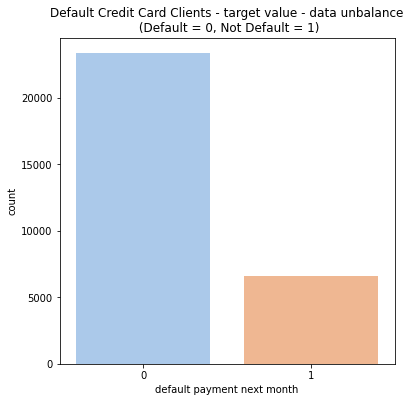

In [7]:
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.countplot(x= 'default payment next month', data = df, palette = 'pastel')

# Amount of credit limit

<AxesSubplot:title={'center':'Amount of credit limit - Density Plot'}, xlabel='LIMIT_BAL'>

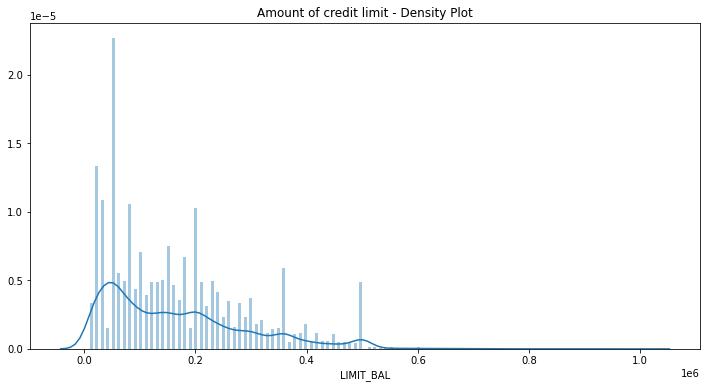

In [9]:
plt.figure(figsize = (12,6))
plt.title('Amount of credit limit - Density Plot')
sns.distplot(df['LIMIT_BAL'], bins = 200)

# Amount of credit limit grouped by default payment next month

In [10]:
dp0 = df.loc[df['default payment next month'] == 0]['LIMIT_BAL']
dp1 = df.loc[df['default payment next month'] == 1]['LIMIT_BAL']

<AxesSubplot:title={'center':'Default amount of credit limit  - grouped by Payment Next Month (Density Plot)'}, xlabel='LIMIT_BAL'>

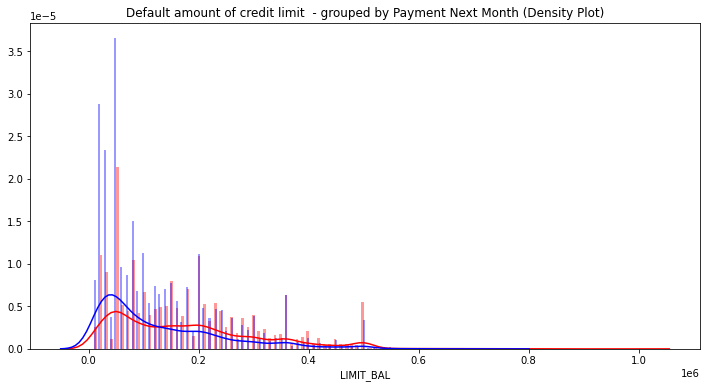

In [11]:
plt.figure(figsize = (12,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sns.distplot(dp0, bins = 200, color = 'Red')
sns.distplot(dp1, bins = 200, color = 'Blue')

# Credit limit vs. sex

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

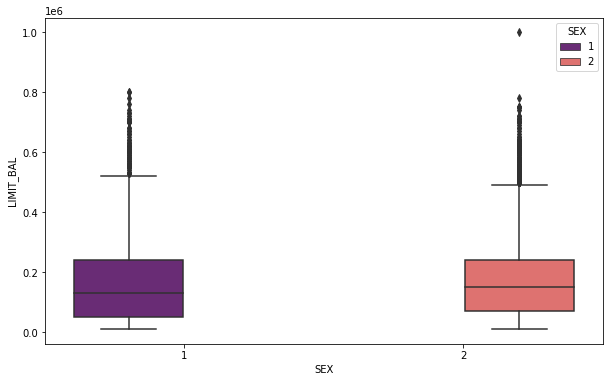

In [12]:
plt.figure(figsize = (10,6))
sns.boxplot(x = "SEX", y = "LIMIT_BAL", hue = "SEX", data = df, palette = 'magma', showfliers = True)

# Box plot of distribution

In [19]:
def boxplot_create(x, y, z, width, color):
    plt.figure(figsize = (width, 8))
    sns.boxplot(x = x, y = y, hue = z, data = df, palette = color, showfliers = False)

# Sex, Education, Age and Marriage

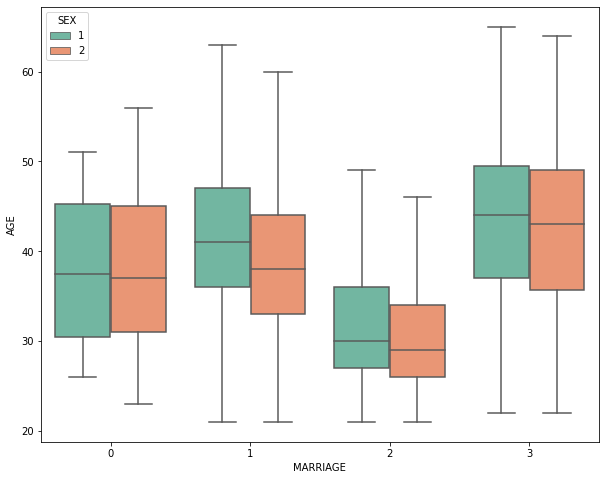

In [20]:
boxplot_create('MARRIAGE','AGE', 'SEX', 10, 'Set2')

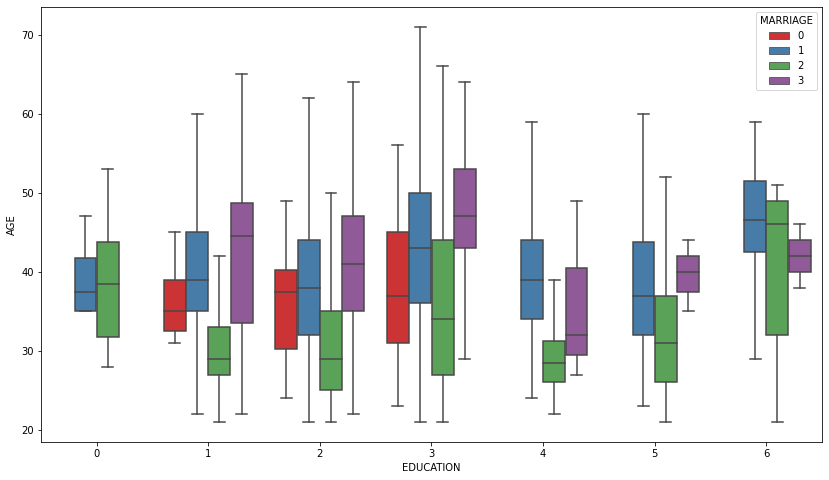

In [21]:
boxplot_create('EDUCATION','AGE', 'MARRIAGE', 14, 'Set1')

# Age, sex and credit amount limit

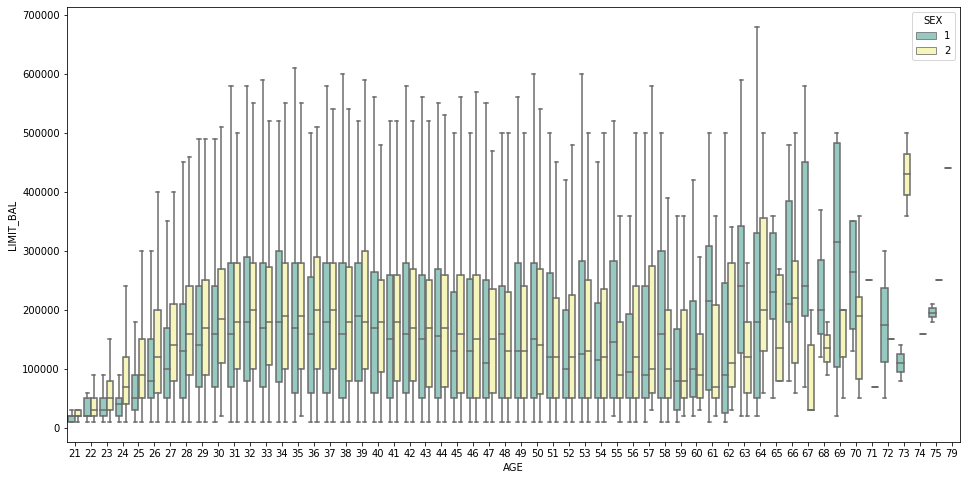

In [22]:
boxplot_create('AGE','LIMIT_BAL', 'SEX', 16, 'Set3')

# Marriage status, education level and credit amount limit

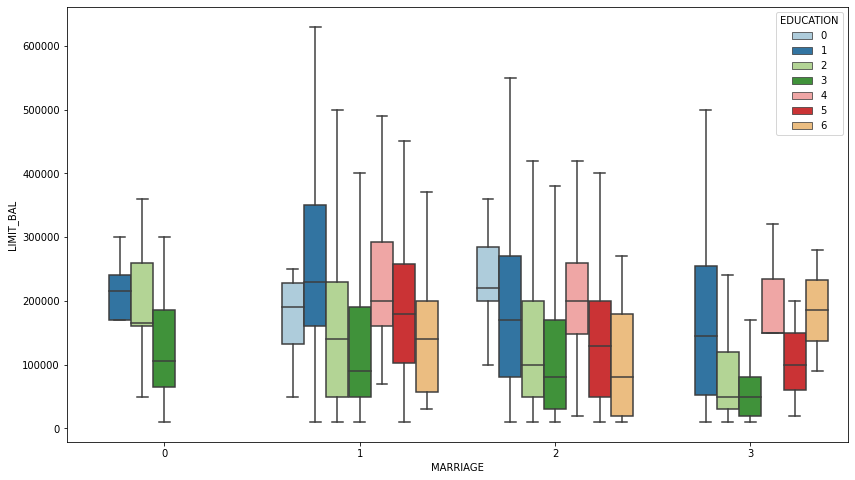

In [23]:
boxplot_create('MARRIAGE','LIMIT_BAL', 'EDUCATION', 14, 'Paired')

# Features correlation

In [13]:
b_atm = df[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
corr1 = b_atm.corr()

<AxesSubplot:title={'center':'Amount of bill statement (Apr-Sept) \nCorrelation plot'}>

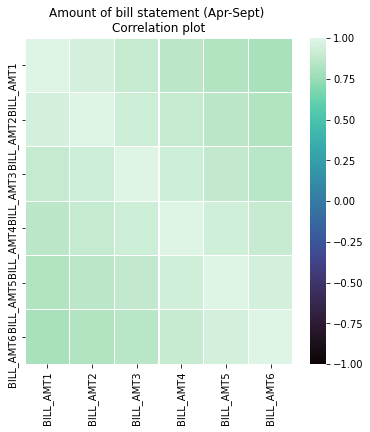

In [14]:
plt.figure(figsize = (6,6))
plt.title('Amount of bill statement (Apr-Sept) \nCorrelation plot')
sns.heatmap(corr1, xticklabels = corr1.columns, yticklabels = corr1.columns, 
            cmap= 'mako', linewidths=.1, vmax = 1, vmin = -1)

In [15]:
p_atm = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5']]
corr2 = p_atm.corr()

<AxesSubplot:title={'center':'Amount of previous payment (Apr-Sept) \nCorrelation plot'}>

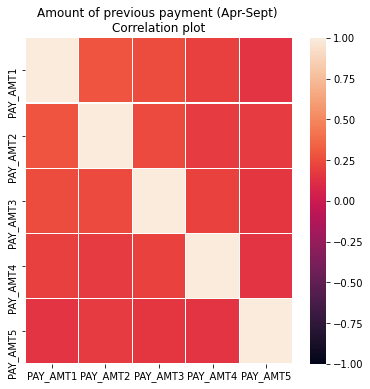

In [16]:
plt.figure(figsize = (6,6))
plt.title('Amount of previous payment (Apr-Sept) \nCorrelation plot')
sns.heatmap(corr2, xticklabels = corr2.columns, yticklabels = corr2.columns, 
            cmap = 'rocket', linewidth = .1, vmax =1, vmin = -1)

In [17]:
pay = df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
corr3 = pay.corr()

<AxesSubplot:title={'center':'Repayment status (Apr-Sept) \nCorrelation plot'}>

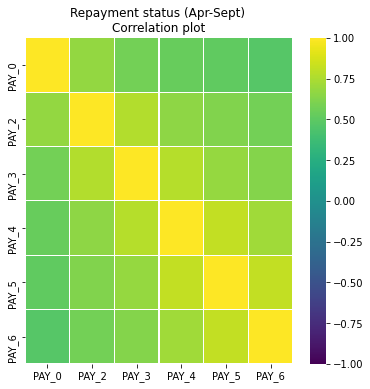

In [18]:
plt.figure(figsize = (6,6))
plt.title('Repayment status (Apr-Sept) \nCorrelation plot')
sns.heatmap(corr3, xticklabels = corr3.columns, yticklabels = corr3.columns, 
            cmap = 'viridis', linewidth = .1, vmax =1, vmin = -1)

# Predictive model

In [24]:
x_data = df.drop({'ID', 'default payment next month'}, axis =1)
y_data = df['default payment next month']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size = 0.45,
                                                    random_state=0, 
                                                    shuffle=True)

In [27]:
from sklearn import metrics
from sklearn.metrics import classification_report

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
logmodel = LogisticRegression()

In [30]:
logmodel.fit(x_train, y_train)

/opt/tljh/user/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [31]:
Yhat1 = logmodel.predict(x_test)

In [32]:
metrics.roc_auc_score(y_test, Yhat1)

0.5001520821695764

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

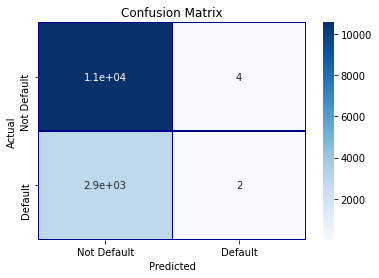

In [33]:
cfm1 = pd.crosstab(y_test, Yhat1, rownames=['Actual'], colnames=['Predicted'])
plt.title('Confusion Matrix')
sns.heatmap(cfm1, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot = True,
            linewidths=.2,linecolor="Darkblue", cmap="Blues")

In [34]:
print(classification_report(y_test, Yhat1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     10570
           1       0.33      0.00      0.00      2930

    accuracy                           0.78     13500
   macro avg       0.56      0.50      0.44     13500
weighted avg       0.69      0.78      0.69     13500



# RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc = RandomForestClassifier()

In [37]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
Yhat2 = rfc.predict(x_test)

In [39]:
metrics.roc_auc_score(y_test, Yhat2)

0.6563809932806158

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

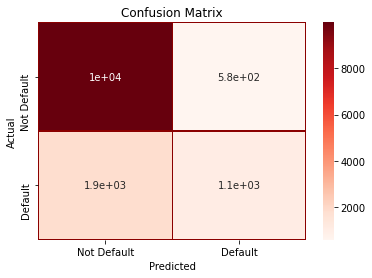

In [40]:
cfm2 = pd.crosstab(y_test, Yhat2, rownames=['Actual'], colnames=['Predicted'])
plt.title('Confusion Matrix')
sns.heatmap(cfm2, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot = True,
            linewidths=.2,linecolor="Darkred", cmap="Reds")

In [41]:
print(classification_report(y_test, Yhat2))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     10570
           1       0.65      0.37      0.47      2930

    accuracy                           0.82     13500
   macro avg       0.75      0.66      0.68     13500
weighted avg       0.80      0.82      0.80     13500



# AdaBoostClassifier

In [42]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
abc = AdaBoostClassifier()

In [44]:
abc.fit(x_train, y_train)

AdaBoostClassifier()

In [45]:
Yhat3 = abc.predict(x_test)

In [46]:
metrics.roc_auc_score(y_test, Yhat3)

0.6372422110358056

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted', ylabel='Actual'>

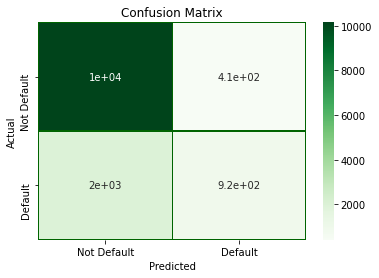

In [47]:
cfm3 = pd.crosstab(y_test, Yhat3, rownames=['Actual'], colnames=['Predicted'])
plt.title('Confusion Matrix')
sns.heatmap(cfm3, 
            xticklabels=['Not Default', 'Default'],
            yticklabels=['Not Default', 'Default'],
            annot = True,
            linewidths=.2,linecolor="Darkgreen", cmap="Greens")

In [48]:
print(classification_report(y_test, Yhat3))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89     10570
           1       0.69      0.31      0.43      2930

    accuracy                           0.82     13500
   macro avg       0.76      0.64      0.66     13500
weighted avg       0.80      0.82      0.79     13500



# <a id="1">In conclusion</a>

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features.
We then investigated three predictive models:

We started with a Logistic Regression model, with the AUC score was 0.5 and the accuracy was 0.78. 
We followed with a RandomForrestClassifier model, with the highest AUC score (0.66) and also the highest accuracy (0.82) .
Then we experimented with an AdaBoostClassifier model, for which the AUC score obtained was 0.63 and 0.82 for the accuracy.


# Choosing RandomForestClassifier Model